In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables -- is this reflecting tables?
Base.classes.keys()

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found
#--- ??

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
Inspector = inspect(engine)

In [11]:
m_cols = Inspector.get_columns("Measurement")
for m in m_cols:
    print(m['name'], m['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
s_cols = Inspector.get_columns("Station")
for s in s_cols:
    print(s['name'], s['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#Trying something
data = pd.read_sql('SELECT * FROM Measurement', conn)
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


# Exploratory Climate Analysis

### Precipitation Analysis

In [14]:
#Max date
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date # --- way to not hardcode this in next cell??

('2017-08-23')

In [15]:
type(most_recent_date[0])

str

In [16]:
most_recent_date[0]

'2017-08-23'

In [39]:
year = most_recent_date[0].split('-')
year

['2017', '08', '23']

In [19]:
#trying something
#x = dt.datetime.timestamp(dt.datetime(int(year[0]), int(year[1]), int(year[2])))
#y = 60*60*24 #1 day
#z = dt.datetime.fromtimestamp(x-y)
#z

datetime.datetime(2017, 8, 22, 0, 0)

In [40]:
print(dt.date(int(year[0]), int(year[1]), int(year[2])))

2017-08-23


In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_12months = dt.date(int(year[0]), int(year[1]), int(year[2])) -  dt.timedelta(days = 365) # ----?

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
pre = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_12months).all()
pre



[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [54]:
# Save the query results as a Pandas DataFrame and set the index to the date column
pre1 = pd.DataFrame(pre).set_index('date')
#, index=pd.date_range(start='2017-08-23',end='2017-07-10', periods=9)) 
pre1

# Sort the dataframe by date
pre1 = pre1.sort_values('date')
pre1



,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


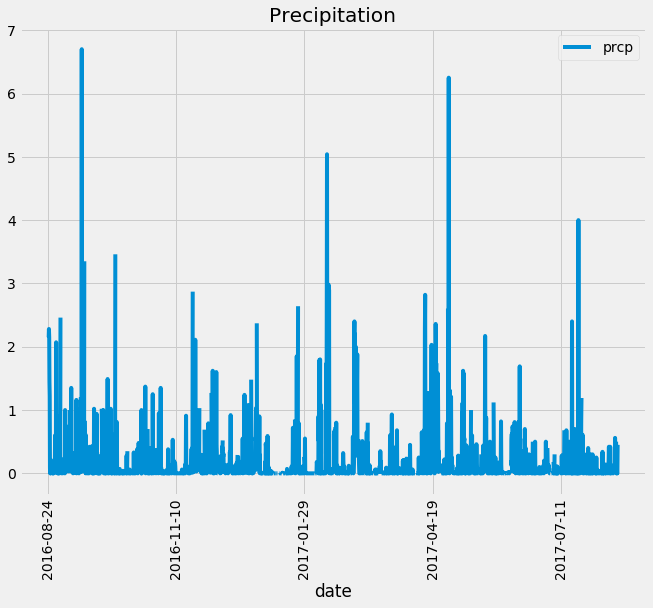

In [55]:
# Use Pandas Plotting with Matplotlib to plot the data

#ax, fig = plt.subplots()
ax = pre1.plot(figsize=(10,8), rot = 90, title = 'Precipitation',label='Precipitation')
plt.legend()


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summ_stat = pre1.describe()
summ_stat

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [71]:
m_cols = Inspector.get_columns("Measurement")
for m in m_cols:
    print(m['name'], m['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [56]:
s_cols = Inspector.get_columns("Station")
for s in s_cols:
    print(s['name'], s['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [69]:
# Design a query to show how many stations are available in this dataset?
avail_stat = session.query(func.count(Station.id)).all()#func.sum(Station.station)).group_by(Station.station).all()
avail_stat #---???

[(9)]

In [74]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active #---???

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
lowest_temp

[('USC00519281', 54.0)]

In [79]:
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
highest_temp

[('USC00519281', 85.0)]

In [80]:
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
avg_temp

[('USC00519281', 71.66378066378067)]

In [90]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#----from above --last_12months = dt.date(int(year[0]), int(year[1]), int(year[2])) -  dt.timedelta(days = 365)

#----from above---most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#----most_recent_date # ---

# Perform a query to retrieve the data and precipitation scores
last_year_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last_12months).all()
last_year_temp


[('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [93]:
temp_df = pd.DataFrame(last_year_temp).set_index('date')
#, index=pd.date_range(start='2017-08-23',end='2017-07-10', periods=9)) 
temp_df

# Sort the dataframe by date
temp_df = temp_df.sort_values('date')
temp_df



,tobs
date,
2016-08-23,81.0
2016-08-23,80.0
2016-08-23,77.0
2016-08-23,80.0
2016-08-23,76.0
...,...
2017-08-22,82.0
2017-08-23,82.0
2017-08-23,81.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002050B0D0EF0>]],
      dtype=object)

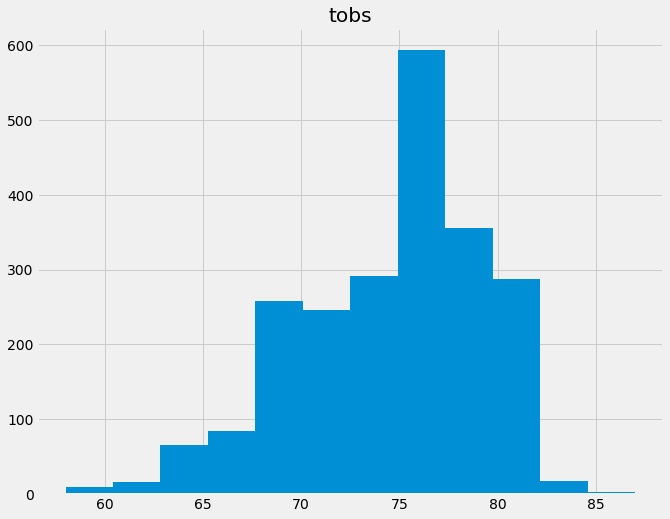

In [94]:
temp_df.hist('tobs', bins = 12, figsize=(10,8)) #, title = 'Temperature')
#plt.legend()

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [35]:
# Plot the daily normals as an area plot with `stacked=False`
